<a href="https://colab.research.google.com/github/ArthurShen8118/Ultrasound_Image_Classify/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())


# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))



# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')

history=classifier.fit_generator(training_set,
                         steps_per_epoch = 152,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 20)



Found 152 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/25
152/152 [==============================] - 4s 24ms/step - loss: 0.5500 - accuracy: 0.8224 - val_loss: 1.4329 - val_accuracy: 0.5000
Epoch 2/25
152/152 [==============================] - 3s 23ms/step - loss: 0.5489 - accuracy: 0.8289 - val_loss: 7.2326 - val_accuracy: 0.5000
Epoch 3/25
152/152 [==============================] - 3s 22ms/step - loss: 0.6154 - accuracy: 0.8289 - val_loss: 1.2031 - val_accuracy: 0.5000
Epoch 4/25
152/152 [==============================] - 3s 23ms/step - loss: 0.4590 - accuracy: 0.8289 - val_loss: 0.8458 - val_accuracy: 0.5000
Epoch 5/25
152/152 [==============================] - 3s 23ms/step - loss: 0.3861 - accuracy: 0.8355 - val_loss: 0.2994 - val_accuracy: 0.9000
Epoch 6/25
152/152 [==============================] - 3s 23ms/step - loss: 0.3600 - accuracy: 0.8553 - val_loss: 0.5770 - val_accuracy: 0.6000
Epoch 7/25
152/152 [==============================] - 4s 24ms

In [11]:
classifier.save('model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [28]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/B mode with ROI2_8.tif', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'DMD'



prediction

'DMD'

Confusion Matrix
[[10  0]
 [10  0]]
Classification Report
              precision    recall  f1-score   support

         dmd       0.50      1.00      0.67        10
      normal       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


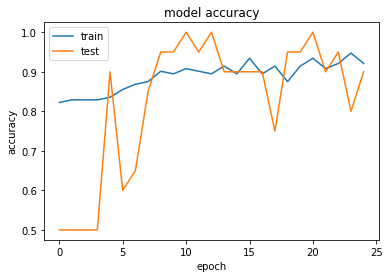

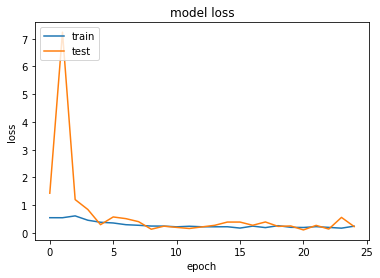

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix



Y_pred = classifier.predict_generator(test_set, steps=20 // 1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = test_set.classes
class_labels = list(test_set.class_indices.keys())   
report = classification_report(target_names, y_pred, target_names=class_labels)
print(report) 

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig('1.jpg')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig('2.jpg')

In [2]:
# Diagram

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def show_train_history (train_history,train,validation):
    
    
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

show_train_history(classifier,'accuracy','val_accuracy')





TypeError: ignored